# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its
ability to answer questions definitively. So let's take what you've learned 
about Python requests, APIs, and JSON traversals to answer a fundamental
question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. 
   **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the
   Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

        
4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` 
   and `VacationPy.ipynb`. These will be the main scripts to run for each
   analysis.

5. Push the above changes to GitHub.

*******************************************************


## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 
500+ cities across the world of varying distance from the equator. 
To accomplish this, you'll be utilizing a [simple Python library]
(https://pypi.python.org/pypi/citipy), 
the [OpenWeatherMap API](https://openweathermap.org/api), and a little 
common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase 
the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and 
analyzing.

Your second requirement is to run linear regression on each relationship, 
only this time separating them into Northern Hemisphere (greater than 
or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 
degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling 
such as any relationships you notice and any other analysis you may have.

**Optional** You will be creating multiple linear regression plots. 
To optimize your code, write a function that creates the linear regression plots.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on 
  latitude and longitude.
* Perform a weather check on each of the cities using a series of successive 
  API calls.
* Include a print log of each city as it's being processed with the city 
  number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.





# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
import json
import urllib
import seaborn as sns
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = weather_api_key = "9dc1a0bf941ca8432869138d960cbd37"

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

url, api_key

('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37',
 '9dc1a0bf941ca8432869138d960cbd37')

In [4]:
# I was having some trouble with the appropriate way to perform the api calls so I have two versions thus far!!!!
# Making an empty list to which we will append information obtained from these api calls and the
# output and enter them into lists and then into a DataFrame for further analyses and visualization

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=jamestown
Processing Record 2 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hobart
Processing Record 3 of Set 1 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=whitehorse
Processing Record 4 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=albany
Processing Record 5 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=tiksi
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ushuaia
Processing Record 7 of Set 1 | rikitea

Processing Record 5 of Set 2 | kachug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kachug
Processing Record 6 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=east%20london
Processing Record 7 of Set 2 | lingyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=lingyuan
Processing Record 8 of Set 2 | uyemskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=uyemskiy
Processing Record 9 of Set 2 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=vanavara
Processing Record 10 of Set 2 | temaraia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=temaraia
City not found...
Processing Record 11 of Set 2 | coihaique
http://api.openweatherm

Processing Record 13 of Set 3 | mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=mana
Processing Record 14 of Set 3 | daimiel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=daimiel
Processing Record 15 of Set 3 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=tumannyy
City not found...
Processing Record 16 of Set 3 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=luderitz
Processing Record 17 of Set 3 | kolosovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kolosovka
Processing Record 18 of Set 3 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hambantota
Processing Record 19 of Set 3 | abnub
http://api.openweathermap.org/

Processing Record 16 of Set 4 | benjamin constant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=benjamin%20constant
Processing Record 17 of Set 4 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=bethel
Processing Record 18 of Set 4 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=yulara
Processing Record 19 of Set 4 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=puerto%20leguizamo
Processing Record 20 of Set 4 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=belushya%20guba
City not found...
Processing Record 21 of Set 4 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=margate
Processing Record 22 of 

City not found...
Processing Record 19 of Set 5 | hanko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hanko
Processing Record 20 of Set 5 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=tessalit
Processing Record 21 of Set 5 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=faya
Processing Record 22 of Set 5 | denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=denpasar
Processing Record 23 of Set 5 | itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=itaituba
Processing Record 24 of Set 5 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=olafsvik
Processing Record 25 of Set 5 | tocopilla
http://api.openweathermap.org/data/2

City not found...
Processing Record 22 of Set 6 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=sorland
Processing Record 23 of Set 6 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=guerrero%20negro
Processing Record 24 of Set 6 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=vysokogornyy
Processing Record 25 of Set 6 | sembakung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=sembakung
Processing Record 26 of Set 6 | impfondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=impfondo
Processing Record 27 of Set 6 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ngukurr
City not found...
Processing Record 28 of Se

Processing Record 27 of Set 7 | axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=axim
Processing Record 28 of Set 7 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=esperance
Processing Record 29 of Set 7 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=anadyr
Processing Record 30 of Set 7 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=belyy%20yar
Processing Record 31 of Set 7 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=puerto%20escondido
Processing Record 32 of Set 7 | guanica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=guanica
Processing Record 33 of Set 7 | port blair
http://api.openweathermap.org

Processing Record 31 of Set 8 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=taltal
Processing Record 32 of Set 8 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=vardo
Processing Record 33 of Set 8 | fez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=fez
Processing Record 34 of Set 8 | oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=oranjestad
Processing Record 35 of Set 8 | kamra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kamra
Processing Record 36 of Set 8 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=saleaula
City not found...
Processing Record 37 of Set 8 | namibe
http://api.openweathermap.org/data/2.5/weather?

Processing Record 38 of Set 9 | do gonbadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=do%20gonbadan
Processing Record 39 of Set 9 | pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=pemba
Processing Record 40 of Set 9 | jarjis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=jarjis
City not found...
Processing Record 41 of Set 9 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=nemuro
Processing Record 42 of Set 9 | okato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=okato
Processing Record 43 of Set 9 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=havre-saint-pierre
Processing Record 44 of Set 9 | puerto carreno
http://ap

Processing Record 44 of Set 10 | lake charles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=lake%20charles
Processing Record 45 of Set 10 | crateus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=crateus
Processing Record 46 of Set 10 | phan rang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=phan%20rang
City not found...
Processing Record 47 of Set 10 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=atar
Processing Record 48 of Set 10 | aranda de duero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=aranda%20de%20duero
Processing Record 49 of Set 10 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ostrovnoy
Processing Record 0 of Set 11 | bu

City not found...
Processing Record 47 of Set 11 | carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=carballo
Processing Record 48 of Set 11 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=westport
Processing Record 49 of Set 11 | luba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=luba
Processing Record 0 of Set 12 | ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ipixuna
Processing Record 1 of Set 12 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=klaksvik
Processing Record 2 of Set 12 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ilulissat
Processing Record 3 of Set 12 | san andres
http://api.openweathermap.

Processing Record 0 of Set 13 | purpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=purpe
Processing Record 1 of Set 13 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=port-cartier
Processing Record 2 of Set 13 | florianopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=florianopolis
Processing Record 3 of Set 13 | shieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=shieli
Processing Record 4 of Set 13 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=korla
Processing Record 5 of Set 13 | ekibastuz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ekibastuz
Processing Record 6 of Set 13 | andros town
http://api.openweathermap.org/data

In [5]:
# place above data into a DataFrame
city_data_pd = pd.DataFrame(city_data)

In [6]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,82.00,69,75,5.82,US,1598212717
1,hobart,-42.88,147.33,41.00,75,75,8.05,AU,1598212758
2,whitehorse,60.72,-135.05,57.99,82,75,8.05,CA,1598212654
3,albany,42.60,-73.97,82.99,65,75,9.17,US,1598212758
4,tiksi,71.69,128.87,38.66,83,100,10.45,RU,1598212589
...,...,...,...,...,...,...,...,...,...
569,hirara,24.80,125.28,85.06,78,100,25.43,JP,1598212800
570,pochutla,15.74,-96.47,86.00,70,90,6.26,MX,1598212800
571,bull savanna,17.89,-77.59,82.47,77,100,6.35,JM,1598212800
572,lyman,48.99,37.80,63.43,49,0,4.94,UA,1598212800


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()



City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,82.00,69,75,5.82,US,1598212717
1,hobart,-42.88,147.33,41.00,75,75,8.05,AU,1598212758
2,whitehorse,60.72,-135.05,57.99,82,75,8.05,CA,1598212654
3,albany,42.60,-73.97,82.99,65,75,9.17,US,1598212758
4,tiksi,71.69,128.87,38.66,83,100,10.45,RU,1598212589
...,...,...,...,...,...,...,...,...,...
569,hirara,24.80,125.28,85.06,78,100,25.43,JP,1598212800
570,pochutla,15.74,-96.47,86.00,70,90,6.26,MX,1598212800
571,bull savanna,17.89,-77.59,82.47,77,100,6.35,JM,1598212800
572,lyman,48.99,37.80,63.43,49,0,4.94,UA,1598212800


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# First filter out those rows which the rows don't contain any data

city_data_pd_dropna = city_data_pd.dropna(how = 'all') 
city_data_pd_dropna  



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,82.00,69,75,5.82,US,1598212717
1,hobart,-42.88,147.33,41.00,75,75,8.05,AU,1598212758
2,whitehorse,60.72,-135.05,57.99,82,75,8.05,CA,1598212654
3,albany,42.60,-73.97,82.99,65,75,9.17,US,1598212758
4,tiksi,71.69,128.87,38.66,83,100,10.45,RU,1598212589
...,...,...,...,...,...,...,...,...,...
569,hirara,24.80,125.28,85.06,78,100,25.43,JP,1598212800
570,pochutla,15.74,-96.47,86.00,70,90,6.26,MX,1598212800
571,bull savanna,17.89,-77.59,82.47,77,100,6.35,JM,1598212800
572,lyman,48.99,37.80,63.43,49,0,4.94,UA,1598212800


In [10]:
#  Get the indices of cities that have humidity over 100%.
#  Get the indices of cities that have humidity over 100%.
# Filter all rows for which the cities' humidities are = 100%
city_data_pd_filtered = city_data_pd[(city_data_pd["Humidity"] == 100)]
  
# Print the new dataframe 
city_data_pd_filtered 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
73,thompson,55.74,-97.86,51.80,100,90,5.82,CA,1598212764
134,yelizovo,53.19,158.38,50.00,100,75,4.47,RU,1598212769
204,denpasar,-8.65,115.22,77.00,100,40,4.70,ID,1598212775
277,ketchikan,55.34,-131.65,57.20,100,90,9.17,US,1598212780
289,petropavlovsk-kamchatskiy,53.05,158.65,50.00,100,75,4.47,RU,1598212781
300,esperance,-33.87,121.90,50.00,100,90,8.05,AU,1598212547
308,mersing,2.43,103.84,73.40,100,79,1.81,MY,1598212783
316,salalah,17.02,54.09,77.00,100,90,4.70,OM,1598212783
373,sibu,2.30,111.82,73.40,100,40,0.98,MY,1598212787
413,askarovo,53.34,58.51,46.40,100,0,4.47,RU,1598212790


In [11]:
city_data_pd_filtered.shape

(12, 9)

In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Filter all rows for which city's have a humidity equal to 100%

clean_city_data_df = city_data_pd.drop(city_data_pd[city_data_pd["Humidity"] >= 100].index, inplace = False) 

clean_city_data_df 



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,82.00,69,75,5.82,US,1598212717
1,hobart,-42.88,147.33,41.00,75,75,8.05,AU,1598212758
2,whitehorse,60.72,-135.05,57.99,82,75,8.05,CA,1598212654
3,albany,42.60,-73.97,82.99,65,75,9.17,US,1598212758
4,tiksi,71.69,128.87,38.66,83,100,10.45,RU,1598212589
...,...,...,...,...,...,...,...,...,...
569,hirara,24.80,125.28,85.06,78,100,25.43,JP,1598212800
570,pochutla,15.74,-96.47,86.00,70,90,6.26,MX,1598212800
571,bull savanna,17.89,-77.59,82.47,77,100,6.35,JM,1598212800
572,lyman,48.99,37.80,63.43,49,0,4.94,UA,1598212800


In [43]:
# Extract relevant fields from the data frame-->done


# Export the City_Data into a csv
clean_city_data_df.to_csv("clean_city_data.csv",encoding="utf-8",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

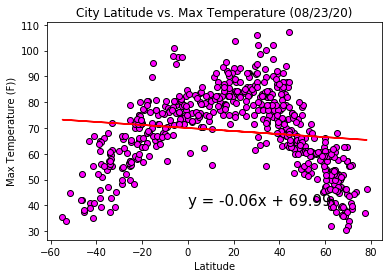

In [14]:
# # Build scatter plot for latitude vs temperature
# plt.scatter(clean_city_data_df["Lat"], 
#             clean_city_data_df["Max Temp"],
#             edgecolor="black", linewidths=1, marker="o",c = "magenta", 
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# 
# 

# # show the graph we coded for...
plt.show()


# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "magenta", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# Save the plot
plt.savefig("Latitude vs Temperature (F).png")
plt.show()


## Latitude vs. Humidity Plot

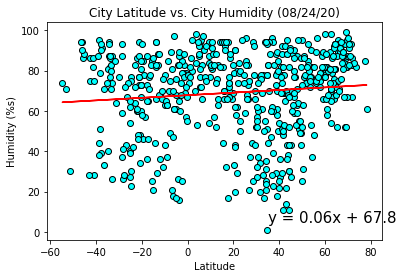

In [44]:
# # Build the scatter plots for each city types
# plt.scatter(clean_city_data_df["Lat"], 
#             clean_city_data_df["Humidity"],
#             edgecolor="black", linewidths=1, marker="o", c = "cyan",
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
# plt.ylabel("Humidity (%)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

#
# # Show plot
# plt.show()

# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "cyan", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,5),fontsize = 15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%s)')
plt.title("City Latitude vs. City Humidity (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("Latitude vs Humidity (%).png")


plt.show()




## Latitude vs. Cloudiness Plot

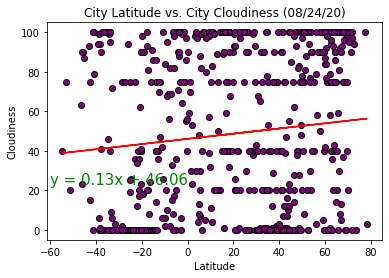

In [45]:
# # Build the scatter plots for each city types
# plt.scatter(clean_city_data_df["Lat"], 
#             clean_city_data_df["Cloudiness"],
#             edgecolor="black", linewidths=1, marker="o", c = "purple",
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
# plt.ylabel("Cloudiness (%)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# 
# 
# # Show plot
# plt.show()


# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "purple", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,23),fontsize = 15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. City Cloudiness (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

plt.show()



## Latitude vs. Wind Speed Plot

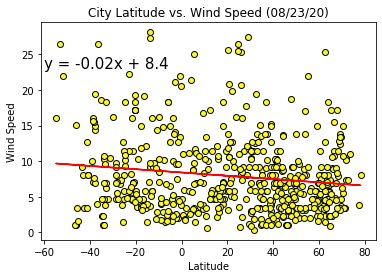

In [17]:
# # Build the scatter plots for each city types
# plt.scatter(clean_city_data["Lat"], 
#             clean_city_data["Wind Speed"],
#             edgecolor="black", linewidths=1, marker="o", c = "green", 
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
# plt.ylabel("Wind Speed (mph)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# # Save the figure
# plt.savefig("Latitude vs Wind Speed (MPH).png")

# # Show plot
# plt.show()

# Add the linear regression equation and line to plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "yellow", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,23),fontsize = 15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")
plt.show()

## Linear Regression

In [46]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
north_h_df = clean_city_data.loc[(clean_city_data_df["Lat"] >= 0)]
south_h_df = clean_city_data.loc[(clean_city_data_df["Lat"] < 0)]

In [19]:
# Northern Hemispher data from cleaned data set
north_h_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,82.00,69,75,5.82,US,1598212717
2,whitehorse,60.72,-135.05,57.99,82,75,8.05,CA,1598212654
3,albany,42.60,-73.97,82.99,65,75,9.17,US,1598212758
4,tiksi,71.69,128.87,38.66,83,100,10.45,RU,1598212589
7,ayia galini,35.10,24.68,82.00,44,0,8.72,GR,1598212759
...,...,...,...,...,...,...,...,...,...
569,hirara,24.80,125.28,85.06,78,100,25.43,JP,1598212800
570,pochutla,15.74,-96.47,86.00,70,90,6.26,MX,1598212800
571,bull savanna,17.89,-77.59,82.47,77,100,6.35,JM,1598212800
572,lyman,48.99,37.80,63.43,49,0,4.94,UA,1598212800


In [20]:
# Southern Hemispher data from cleaned data set
south_h_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hobart,-42.88,147.33,41.00,75,75,8.05,AU,1598212758
5,ushuaia,-54.80,-68.30,35.60,74,40,16.11,AR,1598212699
6,rikitea,-23.12,-134.97,70.11,83,36,22.19,PF,1598212759
8,warmbad,-28.45,18.73,65.55,26,0,4.74,NA,1598212698
10,mataura,-46.19,168.86,42.01,94,23,1.01,NZ,1598212759
...,...,...,...,...,...,...,...,...,...
552,florianopolis,-27.61,-48.50,66.99,72,75,4.70,BR,1598212501
557,rawson,-43.30,-65.10,65.08,28,93,9.22,AR,1598212799
558,luz,-19.80,-45.69,66.09,58,98,5.37,BR,1598212799
561,mitsamiouli,-11.38,43.28,75.94,70,42,1.81,KM,1598212799


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [60]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates, color, edgecolor_parameter):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, edgecolor = edgecolor_parameter, c = color)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig("title.png")
    plt.show()





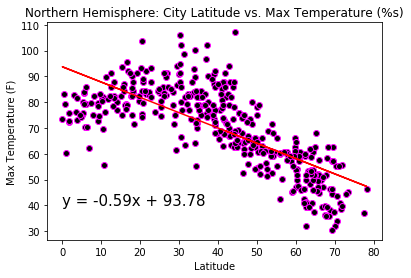

<Figure size 432x288 with 0 Axes>

In [66]:
# Build scatter plot for latitude vs temperature using function created in above cell

plot_linear_regression(north_h_df["Lat"], north_h_df['Max Temp'],
                       "Northern Hemisphere: City Latitude vs. Max Temperature (%s)", "Latitude", "Max Temperature (F)",
                       (0,40),"black", "magenta")
plt.savefig("Northern Hemisphere: City Latitude vs. Max Temperature_2.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [59]:
# plt.scatter(south_h_df["Lat"], 
#             south_h_df["Max Temp"],
#             edgecolor="black", linewidths=1, marker="o",c = "red", 
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.plot(x_values,regress_values,"r-", c= "black")
# plt.annotate(line_eq,(0,30),fontsize=15,color= "black")
# plt.xlabel('Latitude in Northern Hemisphere')
# plt.ylabel("Max Temperature (F)")
# plt.show()
# #plt.grid(True)
# #sns.set()
# # Show plot
# plt.show()



plot_linear_regression(south_h_df["Lat"], south_h_df['Max Temp'],
                       "Southern Hemisphere: City Latitude vs. City Max Temperature (F)", "City Latitude", 
                       "Max Temperature (F)", (-20,40),"black", "magenta","Southern Hemisphere: City Latitude vs. City Max Temperature (F).png")

# Save the figure
plt.savefig("Southern Hemisphere: City Latitude vs. City Max Temperature (F).png")




#Add the linear regression equation and line to plot
x_values = south_h_df["Lat"]
y_values = south_h_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "magenta")
plt.plot(x_values,regress_values,"r-", c= "black")
plt.annotate(line_eq,(-50,80),fontsize=15,color= "black")
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel("Max Temperature (F)")
plt.savefig("Southern Hemisphere: City Latitude vs. City Max Temperature (F)_1.png")
plt.show()



TypeError: plot_linear_regression() takes 8 positional arguments but 9 were given

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

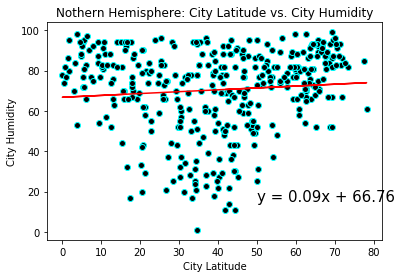

NameError: name 'tips' is not defined

<Figure size 432x288 with 0 Axes>

In [52]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns#; sns.set(style="white", color_codes=True)

plt.savefig("Nothern Hemisphere: City Latitude Linear Regression vs. City Humidity_2.png")

plot_linear_regression(north_h_df["Lat"], north_h_df['Humidity'],
                       "Nothern Hemisphere: City Latitude vs. City Humidity", "City Latitude", 
                       "City Humidity", (50,15),"black", "cyan")


plt.savefig("Nothern Hemisphere: City Latitude Linear Regression vs. City Humidity_2.png")





# Show plot
# plt.show()
# 
# # Add the linear regression equation and line to plot
x_values = north_h_df["Lat"]
y_values = north_h_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "magenta")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,c = "black")
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel("Humidity)")
plt.savefig("Nothern Hemisphere: City Latitude Linear Regression vs. City Humidity_1.png")
plt.show()



In [32]:
plt.savefig("Nothern Hemisphere: City Latitude Linear Regression vs. City Humidity.png")

<Figure size 432x288 with 0 Axes>

In [53]:
# This is extra code,from https://stackoverflow.com/questions/31568874/how-to-change-the-line-color-in-seaborn-linear-regression-jointplot
# I have been searching to simply change the regression line color to anything but red, this is all I could find, so mind the first figure but
# the next ones are cool too
g = sns.jointplot(x = north_h_df["Lat"], y= north_h_df['Humidity'], data=tips, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}}) # Only regression cyan


# Save the figure
plt.savefig("Nothern Hemisphere: City Latitude vs. City Humidity.png")



NameError: name 'tips' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

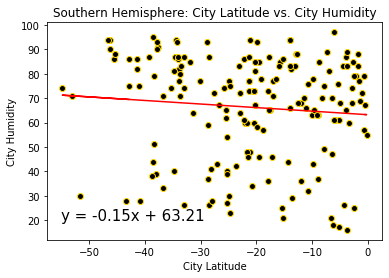

NameError: name 'tips' is not defined

<Figure size 432x288 with 0 Axes>

In [54]:
plot_linear_regression(south_h_df["Lat"], south_h_df['Humidity'],
                       "Southern Hemisphere: City Latitude vs. City Humidity", "City Latitude", 
                       "City Humidity", (-55,20),"black", "gold")

plt.savefig("Southern Hemisphere - City Latitude Linear Regression vs. Humidity.png")
# This is extra code,from https://stackoverflow.com/questions/31568874/how-to-change-the-line-color-in-seaborn-linear-regression-jointplot
# I have been searching to simply change the regression line color to anything but red, this is all I could find, so mind the first figure but
# the next ones are cool too
g = sns.jointplot(x = south_h_df["Lat"], y= south_h_df['Humidity'], data=tips, kind='reg',
                  joint_kws={'line_kws':{'color':'green'}}) # Only regression green

plt.savefig("Southern Hemisphere - City Latitude Linear Regression (Seaborn) vs. Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

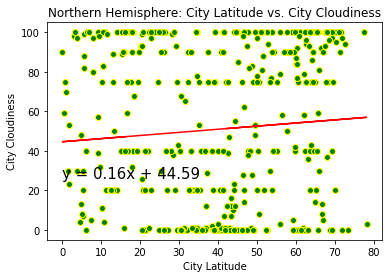

<Figure size 432x288 with 0 Axes>

In [55]:
plt.savefig("Northern Hemisphere - City Latitude Linear Regression vs. Cloudiness.png")

plot_linear_regression(north_h_df["Lat"], north_h_df['Cloudiness'],
                       "Northern Hemisphere: City Latitude vs. City Cloudiness", "City Latitude", 
                       "City Cloudiness", (0,26),"green", "yellow")

plt.savefig("Northern Hemisphere - City Latitude Linear Regression vs. Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

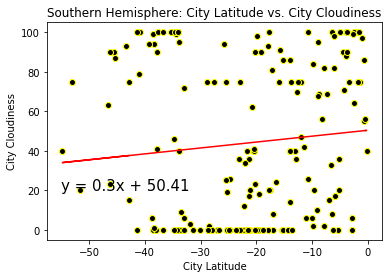

<Figure size 432x288 with 0 Axes>

In [56]:
plt.savefig("Southern Hemisphere - City Latitude Linear Regression vs. Cloudiness.png")

plot_linear_regression(south_h_df["Lat"], south_h_df['Cloudiness'],
                       "Southern Hemisphere: City Latitude vs. City Cloudiness", "City Latitude", 
                       "City Cloudiness", (-55,20),"black", "yellow")

plt.savefig("Southern Hemisphere - City Latitude Linear Regression vs. Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

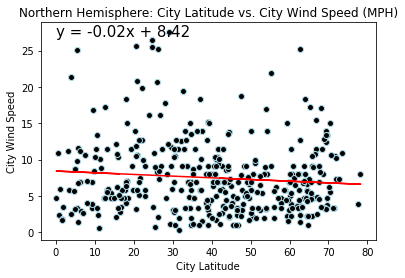

<Figure size 432x288 with 0 Axes>

In [57]:
plt.savefig("Northern Hemisphere - City Latitude Linear Regression vs. Wind Speed_1.png")


plot_linear_regression(north_h_df["Lat"], north_h_df['Wind Speed'],
                       "Northern Hemisphere: City Latitude vs. City Wind Speed (MPH)", "City Latitude", 
                       "City Wind Speed", (0,27),"black", "lightblue")

plt.savefig("Northern Hemisphere - City Latitude Linear Regression vs. Wind Speed_1.png")
 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

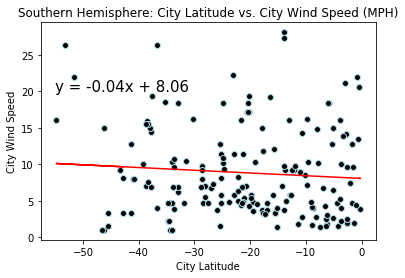

<Figure size 432x288 with 0 Axes>

In [58]:
plt.savefig("Southern Hemisphere - City Latitude Linear Regression vs. Wind Speed_1.png")


plot_linear_regression(south_h_df["Lat"], south_h_df['Wind Speed'],
                       "Southern Hemisphere: City Latitude vs. City Wind Speed (MPH)", "City Latitude", 
                       "City Wind Speed", (-55,20),"black", "lightblue")
 
plt.savefig("Southern Hemisphere - City Latitude Linear Regression vs. Wind Speed_1.png")

